In [16]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
 pip install matplotlib

     ---------------------------------------- 7.6/7.6 MB 22.3 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 27.4 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 27.6 MB/s eta 0:00:00
     -------------------------------------- 103.1/103.1 kB 5.8 MB/s eta 0:00:00
     -------------------------------------- 186.7/186.7 kB 5.7 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp310-cp310-win_amd64.whl (56 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
pip install pandas

     --------------------------------------- 10.7/10.7 MB 27.3 MB/s eta 0:00:00
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
pip install keras

     ---------------------------------------- 1.7/1.7 MB 7.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [74]:
pip install --upgrade pip

     ---------------------------------------- 2.1/2.1 MB 9.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1
Note: you may need to restart the kernel to use updated packages.


In [76]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [20]:
##safety executable check (for conda env)
import sys
sys.executable

'C:\\Users\\Acer\\PycharmProjects\\pythonProject6\\venv\\Scripts\\python.exe'

### Wprowadzone poprawki :)

* zmianiłam nazwy plików tak, żeby miały końcówkę '.mp3'
* zmieniłam np.int_ na int (ale to chyba nie jest konieczne)
* zmieniłam  librosa.rmse na librosa.rms
* zakomentowałam sgd w sekcji "Multilayer Perceptron (MLP) for multi-class softmax classification (Keras Tensorflow)"
* zakomentowałam linię "svm_clf.predict_proba(X_test)[0:10] #IT IS NOT WORKING, CHECK LATER", bo zgodnie z komentarzem nie działa
zmieniłam w sekcjach "Compute Confussion Matrix" [y_predict] na [y_predict-1] i [y_test] na [y_test-1] 
* zmieniłam max_features="auto na max_features=None w sekcji "Random Forest Classification (Sklearn)" (nie wiem czy tak można, bo było napisane że to wpływa na liczbę cech, któe są uwzględniane, ale jakoś działa)
* zmieniłam 'from keras.layers.recurrent import LSTM' na 'from keras.layers import LSTM' w sekcji 'RNN Classification (Keras Tensorflow)'

### Zmiana nazwy plików

In [21]:
#import os
#path1 = "audio files/Low"
#path2 = "audio files/Intermediate"
#path3 = "audio files/High"
#audiofiles1 = os.listdir(path1)
#for file in audiofiles1:
#   os.rename(os.path.join(path1, file), os.path.join(path1, file + '.mp3'))
#audiofiles2 = os.listdir(path2)
#for file in audiofiles2:
#   os.rename(os.path.join(path2, file), os.path.join(path2, file + '.mp3'))
#audiofiles3 = os.listdir(path3)
#for file in audiofiles3:
#   os.rename(os.path.join(path3, file), os.path.join(path3, file + '.mp3'))

### Avalinguo Audioset Experiments

- This data set was constructed by researchers at the Intelligent Systems department at ITESM
- It contains audio segments of conversation among people. The segments are contained within three folders representing the fluency levels; Low, Intermediate, High
- The audio files were gathered from the internet, from known friends and from audios provided by the language center at ITESM

### Audio Feature Extraction

In [26]:
# Nagrania używane do uczenia sieci są zawarte w trzech folderach reprezentują poziomy płynności posługiwania się językiem angielskim: Niski, średni, wysoki

# pobrane biblioteki
import glob
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import soundfile as sf

## funkcja zwraca pliki dźwiękowe 
# biblioteka librosa pozwala na załadowanie nagrań do programu 
# Dane audio są przechowywane w zmiennej X, a częstotliwość próbkowania jest przechowywana w zmiennej sample_rate. 
def feature_extraction(file_name):
    #X, sample_rate = sf.read(file_name, dtype='float32')
    X , sample_rate = librosa.load(file_name, sr=None) #Can also load file using librosa
    # sprawdza, czy dane audio X mają więcej niż jeden wymiar. 
    # Jeśli tak, wybiera tylko pierwszy kanał (X[:, 0])
    if X.ndim > 1:
        X = X[:,0]
    X = X.T
    
    ## stFourier Transform
    # Oblicza Transformatę Fouriera nagrań audio, co pozwala na wyciągniecie częstotliwości z nagrań
    stft = np.abs(librosa.stft(X))

    ## stFourier Transform
    # Oblicza Transformatę Fouriera nagrań audio, co pozwala na wyciągniecie częstotliwości z nagrań
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=20).T, axis=0) #Returns N_mel coefs

    # Oblicza średni błąd kwadratowy danych audio.
    rmse = np.mean(librosa.feature.rms(y=X).T, axis=0) #RMS Energy for each Frame (Stanford's). Returns 1 value 

    # Oblicza strumień widmowy na podstawie oszacowania siły początkowej.
    spectral_flux = np.mean(librosa.onset.onset_strength(y=X, sr=sample_rate).T, axis=0) #Spectral Flux (Stanford's). Returns 1 Value

    # Oblicza współczynnik przejścia przez zero danych audio
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=X).T, axis=0) #Returns 1 value
    
    #mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T, axis=0) #Returns 128 values
    #chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0) #Returns 12 values
    #contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T, axis=0) #Returns 7 values
    #tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T, axis=0) #tonal centroid features Returns 6 values
    
    ##Return computed audio features
    return mfccs, rmse, spectral_flux, zcr
    
# zwraca tablicę z cechami i etykietami 
def parse_audio_files(parent_dir, sub_dirs, file_ext='*.mp3'): # Audio Format

    # Liczba współczynników cepstralnych częstotliwości Mel
    n_mfccs = 20 # This variable is tunneable with each run

    # Liczba cech audio
    number_of_features = 3 + n_mfccs
    #number_of_features = 154 + n_mfccs # 154 are the total values returned by rest of computed features
    features, labels = np.empty((0,number_of_features)), np.empty(0)
    
    # Wyodrębnia cechy dla każdego pliku audio
    # sub-dir: lista podkatalogów w katalogu rodzicielskim, w których znajdują
    # się pliki audio 
    # parent-dir: główny katalog
    # file_ext: rozszerzenie plków
    for label, sub_dir in enumerate(sub_dirs): ##The enumerate() function adds a counter to an iterable.
        for file_name in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)): ##parent is data, sub_dirs are the classes
            print ("Actual File Name: ", file_name)
            try:
                # wyodrębnienie cech dla każdego pliku audio 
                mfccs, rms, spectral_flux, zcr = feature_extraction(file_name)
                #mfccs, zcr, mel, chroma, contrast, tonnetz = feature_extraction(file_name)
            except Exception as e:
                print("[Error] there was an error in feature extraction. %s" % (e))
                continue
             # Wyodrębnione cechy są układane poziomo w celu utworzenia tablicy reprezentującej cechy pojedynczego pliku audio
            extracted_features = np.hstack([mfccs, rms, spectral_flux, zcr])
            #print( "Total Extracted Features: ", len(extracted_features)) #This helps us identify really how many features are being computed
            
            # Tablica gromadzi cechy wielu plików audio
            features = np.vstack([features, extracted_features]) #Stack arrays in sequence vertically (row wise).
            labels = np.append(labels, label)
        print("Extracted features from %s, done" % (sub_dir))
    # funkcja zwraca tablicę z wyodrębnionymi cechami audio oraz tablicę z etykietami katalogów    
    return np.array(features), np.array(labels, dtype = int) ## arrays with features and corresponding labels for each audio

In [27]:
# Odczytuje podkatalogi w katalogu głównym głównym, następnie sortuje je alfabetycznie oraz oraz wypisuje listę podkatalogów
# podkatalogi: Low, Intermediate, High
import os
audio_subdirectories = os.listdir("audio files/")
audio_subdirectories.sort()
print ('Audio Subdirs: ', audio_subdirectories)

Audio Subdirs:  ['.ipynb_checkpoints', 'High', 'Intermediate', 'Low']


In [17]:
##Get features and labels
#NumPy array files are created. Files are binary files to store numpy arrays

# Parse Audio Files Function Call
# wyodrębnia cechy oraz etykiety z plików audio i zapisuje jako pliki binarne
features, labels = parse_audio_files("audio files/", audio_subdirectories) #(parent dir,sub dirs)

# Zapisuje tablice cech i etykiet
np.save('feat.npy', features) 
np.save('label.npy', labels)

Extracted features from .ipynb_checkpoints, done
Actual File Name:  audio files/High\Avalinguo - Alan and Eduardo segment 100 - A.mp3
Actual File Name:  audio files/High\Avalinguo - Alan and Eduardo segment 101 - A.mp3
Actual File Name:  audio files/High\Avalinguo - Alan and Eduardo segment 102 - A.mp3
Actual File Name:  audio files/High\Avalinguo - Alan and Eduardo segment 103 - A.mp3
Actual File Name:  audio files/High\Avalinguo - Alan and Eduardo segment 104 - A.mp3
Actual File Name:  audio files/High\Avalinguo - Alan and Eduardo segment 105 - A.mp3
Actual File Name:  audio files/High\Avalinguo - Alan and Eduardo segment 106 - A.mp3
Actual File Name:  audio files/High\Avalinguo - Alan and Eduardo segment 107 - A.mp3
Actual File Name:  audio files/High\Avalinguo - Alan and Eduardo segment 108 - A.mp3
Actual File Name:  audio files/High\Avalinguo - Alan and Eduardo segment 109 - A.mp3
Actual File Name:  audio files/High\Avalinguo - Alan and Eduardo segment 110 - A.mp3
Actual File Name

In [18]:
#Load np files
import numpy as np

# Załadowanie cech audio
features= np.load('feat.npy')
print(len(features[1])) #Each element of features array corresponds to the features of an individual frame: [ [Features Segment1], ... [Features Segment n] ]
#print(features[10]) #First ten Segment Features

23


In [19]:
print (len(features))

1424


### Data Exploration

In [4]:
# Wczytanie pliku z etykietami do zmiennej labels
# Ładuje tablicę z etykietami podkatalogów z pliku binarnego oraz wyświetla nazwy etykiet
labels = np.load('label.npy') #10 labels total
#print(labels)

# Tworzenie tablicy z etykietami
label_classes = np.array(['Low','Intermediate','High'])
print(label_classes)

['Low' 'Intermediate' 'High']


In [27]:
#Load np files
import numpy as np
features= np.load('feat.npy')

#Pandas dataframe with N features for each audio
import pandas as pd
df = pd.DataFrame(features)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-281.734741,166.075211,-21.160431,6.532601,2.979279,22.189999,-10.231734,4.651950,-3.719599,2.327224,...,-2.592959,6.714687,-3.792706,-0.873460,-5.639598,6.689115,-2.804465,0.045856,1.284617,0.057003
1,-290.410645,171.182236,-16.901394,13.689313,-3.379734,25.219151,-12.704763,6.673484,-2.981911,-1.246125,...,-4.219006,4.892667,-3.556123,-1.375835,-4.812611,1.999985,-3.048411,0.046230,1.206579,0.058213
2,-285.756592,183.053818,-20.450602,5.902560,-4.315532,22.155958,-9.893904,8.052901,0.644165,0.898867,...,-2.663830,2.389131,-3.319464,0.211620,-5.563639,0.639604,-3.188232,0.049886,1.196276,0.050652
3,-262.334717,163.403015,-21.870684,20.443388,-5.724149,19.962238,-15.266714,12.120731,-4.820594,3.328996,...,-7.343780,4.151348,-3.786149,1.485566,-7.596982,3.764286,-4.126033,0.058674,1.343122,0.072026
4,-289.639893,174.857788,-17.720285,13.242723,6.251698,28.814657,-13.018053,5.369229,1.617697,-2.149780,...,-6.182564,1.660501,-4.353034,-0.491772,-5.175145,4.699944,-3.421792,0.054477,1.231610,0.047496


#### Visualize the MFCC series

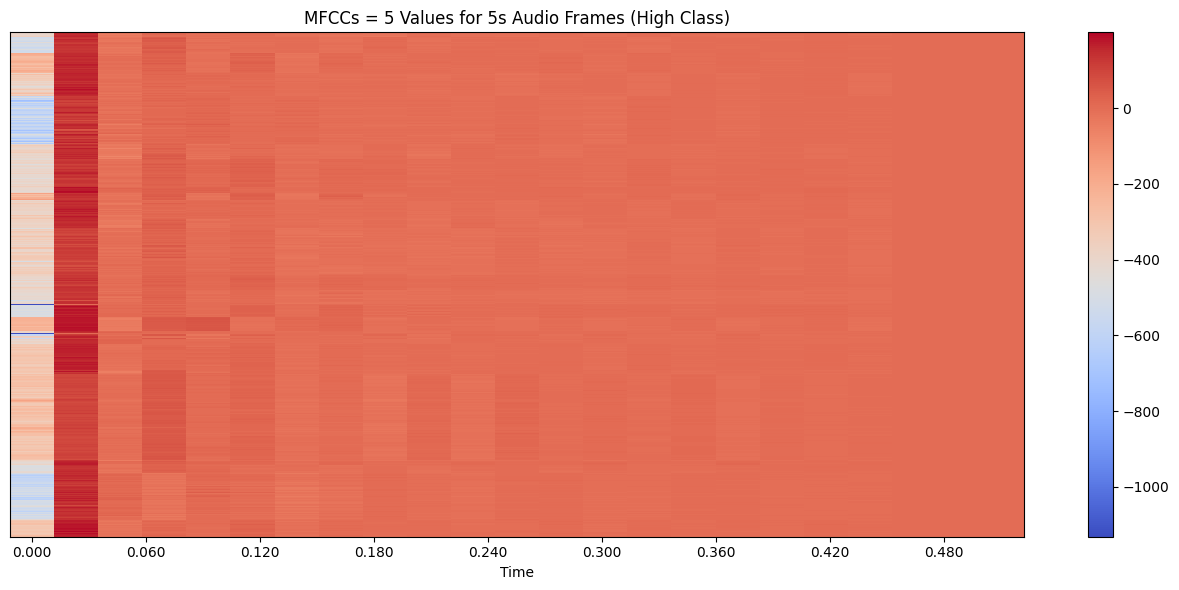

In [28]:
#wyświetlenie cech w zależności od czasu
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(13, 6))
# Wyświetla spektogram cech plików audio w funkcji czasu
# Cechy znajdują sie w tablicy, w której wiersz reprezentuje cechy pojedynczego pliku, a kolumny określne cechy
librosa.display.specshow(features, x_axis='time')
plt.colorbar()
plt.title('MFCCs = 5 Values for 5s Audio Frames (High Class)')
plt.tight_layout()
# Zapisanie spektogramu
plt.savefig('test saving.png')
#Correct Interpretation of MFCC Spectrograms??: https://dsp.stackexchange.com/questions/38830/whats-the-correct-graphical-interpretation-of-a-series-of-mfcc-vectors

In [23]:
features.shape #1424 Frames (Segments), 5 MFCCs
len(features[1])

23

#### Plot of spectrograms using Librosa module
- Reference: https://librosa.github.io/librosa/generated/librosa.display.specshow.html

C:\Users\Acer\AppData\Local\Temp\ipykernel_15124\2622017722.py:7: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max) #Convert amplitude into db


Text(0.5, 1.0, 'Linear power spectrogram (grayscale)')

<Figure size 2000x1500 with 0 Axes>

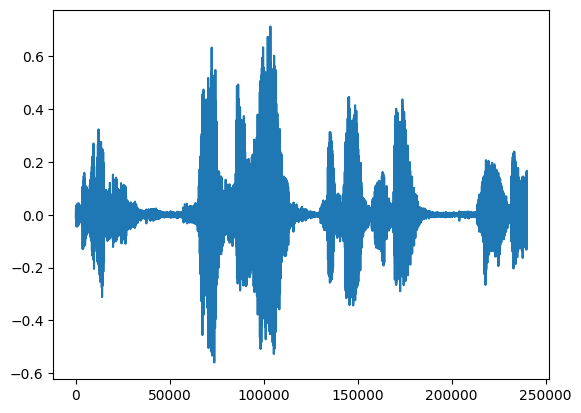

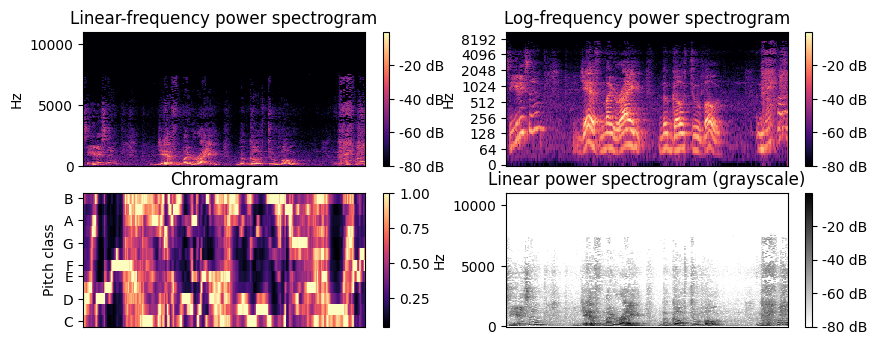

In [50]:
#Visualize an STFT power spectrum
import matplotlib.pyplot as plt
# y - szereg czasowy audio
# sr - częstotliwość próbkowania
newFile = 'audio files/Low/Avalinguo - Xoca and Josué segment 100 - J.mp3'
y , sr = librosa.load(newFile, sr=None) # Using my own audio segment
#y, sr = librosa.load(librosa.util.example_audio_file())
plt.figure(figsize=(20, 15))

# Konwertuje wartości amplitudy na decybele
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max) #Convert amplitude into db
plt.figure()
X , sample_rate = librosa.load(newFile, sr=None)
plt.plot( X)

plt.figure(figsize=(10,8))
plt.subplot(4, 2, 1)

# Wyświetla spektogram mocy o częstotliwości liniowej
librosa.display.specshow(D, y_axis='linear') #Linear Scale
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

# The above one on a logarithmic scale
plt.subplot(4, 2, 2)
#plt.figure(figsize=(20, 10))
# Wyświetlenie spektogramu w skali logarytmicznej
librosa.display.specshow(D, y_axis='log') #Log scale
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')

# Draw a chromagram with pitch classes
C = librosa.feature.chroma_cqt(y=y, sr=sr)
plt.subplot(4, 2, 3)
# Wyświetla chromatogram przedstawiający rozkład energii wysokości tonów plików audio
librosa.display.specshow(C, y_axis='chroma')
plt.colorbar()
plt.title('Chromagram')

#Force a grayscale colormap (white -> black)
plt.subplot(4, 2, 4)
# Wyświetla spektogram mocy o częstotliwości liniowej przy użyciu mapy kolorów w skali szarości
librosa.display.specshow(D, cmap='gray_r', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear power spectrogram (grayscale)')




### Multilayer Perceptron (MLP) for multi-class softmax classification (Keras Tensorflow)

In [7]:
# Implementuje sieć neuronową za pomocą biblioteki Keras
# Model jest trenowany i testowany plikami audio zawartymi w katalogu
# Jego zadaniem jest klasyfikacja dźwięku do jednej z trzech klas
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

# Fix random seed number
# Zapewnia powtarzalność wyników
np.random.seed(7)

# Załadowanie cech i etykiet
X = np.load('feat.npy')
y = np.load('label.npy').ravel() #Return a contiguous flattened array.

number_of_features = len(X[1]) #This is variable with each run
number_of_classes = 3

# Podzielenie dane na zbiory uczące 70% i testowe 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

# Neural Network Architecture
# Definiuje architekturę sieci neuronowej
# Sequential - liniowy zestaw warstw do budowania modeli sieci neuronowych
model = Sequential() # Define Sequential model

# Using relu on the first two layers and softmax on the output layer
# Dodawanie warstw do wytworzonego modelu

# Pierwsza warstwa sieci neuronowej
#N neurons, Number_Fatures-dimensional vectors
# input_dim: określa wymiar wejścia
# Warstwa ma 512 neuronów
model.add(Dense(512, input_dim=number_of_features, activation='relu')) # warstwa dwuwymiarowa, 512 neuronów, 23 wejścia 
# Losowo ustawia część jednostek wejściowych na 0 podczas treningu, aby zapobiec nadmiernemu dopasowaniu sieci
model.add(Dropout(0.5)) 


# Druga warstwa sieci neuronowej
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# 3 Warstwa wyjściowa generująca wyniki klasyfikacji w formie prawdopodobieństwa przynależności do klas
# 3 neurony wyjściowe odpowiadające trzem poziomom językowym  
# softmax - przekształca wyniki z warstwy wyjściowej na rozkład prawdopodobieństw, gdzie każda jednostka reprezentuje prawdopodobieństwo przynależności do danej klasy 
model.add(Dense(number_of_classes, activation='softmax'))#Softmax to funkcja matematyczna przekształcająca wektor liczb w wektor prawdopodobieństw

# Model Compilation. Loss for multi-class classification problem
#sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# loss - określa funkcję straty podczas treningu modelu
# opimizer - wybiera optymalizator, który będzie używany podczas treningu modelu. Optymalizatory regulują proces aktualizacji wag w trakcie uczenia się modelu.
# metrics - Określa metryki, które będą monitorowane podczas treningu. W tym przypadku, monitorowana jest dokładność klasyfikacji
rmsprop = 'rmsprop'
adam = 'adam' # adam automatycznie dostosowuje szybkość uczenia się dla każdej zmiennej wejściowej dla funkcji celu
model.compile(loss='categorical_crossentropy',
              optimizer= rmsprop, #rmsprop utrzymuje średnią ruchomą gradientów i wykorzystuje tę średnią do oszacowania wariancji
              metrics=['accuracy']) #dokładność - na ile dany pasuje do etykiety

# Convert labels to categorical one-hot encoding
# Przekształca etykiety klas na kodowanie jednostkowe typu "one-hot"
# Funkcja tworzy macierz binarną, gdzie każda kolumna reprezentuje jedną klasę, a wartości w kolumnie są zerami i jedynkami, wskazując przynależność do danej klasy.
y_train = keras.utils.to_categorical(y_train-1, num_classes= number_of_classes) #określa macierz przynaleźności każdego pliku do etykiety, kiedy przynależy => 1 nie przynależy => 0
y_test = keras.utils.to_categorical(y_test-1, num_classes= number_of_classes)

# Uczenie modelu na danych szkoleniowych dla 300 epok przy rozmiarze partii 64
model.fit(X_train, y_train, epochs=300, batch_size=64) #trenowanie modelu w 300 epokach (liczba pełnych przejść przez zbiór danych szkoleniowych), 64 próbki w partii

#model.save("modelMLP.model")

# Ocena modelu na podstawie danych testowych i wyświetla jego dokładność.
# score - Przechowuje wartość funkcji straty (loss) modelu dla zestawu testowego
# acc - Przechowuje dokładność (accuracy) modelu dla zestawu testowego. Oznacza to, jak wiele przykładów ze zbioru testowego zostało poprawnie sklasyfikowanych przez model
# batch-size - Określa rozmiar partii danych, które są przetwarzane jednocześnie przez model podczas oceny. Wartość 64 oznacza, że dane testowe są przetwarzane w partiach po 64 przykłady naraz.
score, acc = model.evaluate(X_test, y_test, batch_size=64)

Epoch 1/300
16/16 [==============================] - 2s 17ms/step - loss: 28.3446 - accuracy: 0.3745
Epoch 2/300
16/16 [==============================] - 0s 14ms/step - loss: 11.0988 - accuracy: 0.4508
Epoch 3/300
16/16 [==============================] - 0s 14ms/step - loss: 7.3659 - accuracy: 0.4618
Epoch 4/300
16/16 [==============================] - 0s 14ms/step - loss: 3.5586 - accuracy: 0.5402
Epoch 5/300
16/16 [==============================] - 0s 15ms/step - loss: 2.5977 - accuracy: 0.5753
Epoch 6/300
16/16 [==============================] - 0s 15ms/step - loss: 1.8590 - accuracy: 0.5763
Epoch 7/300
16/16 [==============================] - 0s 14ms/step - loss: 1.3638 - accuracy: 0.6205
Epoch 8/300
16/16 [==============================] - 0s 15ms/step - loss: 1.2003 - accuracy: 0.6235
Epoch 9/300
16/16 [==============================] - 0s 14ms/step - loss: 0.9725 - accuracy: 0.6396
Epoch 10/300
16/16 [==============================] - 0s 15ms/step - loss: 0.8481 - accuracy: 0.66

INFO:tensorflow:Assets written to: modelMLP.model\assets


7/7 [==============================] - 0s 6ms/step - loss: 0.3261 - accuracy: 0.9206


In [26]:
print ('Test score:', score)
print ('Test accuracy:', acc)

Test score: 0.3004247844219208
Test accuracy: 0.9112149477005005


#### SVM Classification 

- The C parammeter in SVM: https://stats.stackexchange.com/questions/31066/what-is-the-influence-of-c-in-svms-with-linear-kernel
- What are C and gamma in SVM? https://www.quora.com/What-are-C-and-gamma-with-regards-to-a-support-vector-machine

In [27]:
#Load data from generated numpy files
X = np.load('feat.npy') # list of features
# ravel - spłaszcza wielowymiarowe tablice do jednowymiarowej tablicy
y = np.load('label.npy').ravel() # labels are the target

In [28]:
X[:10]

array([[-2.81734741e+02,  1.66075211e+02, -2.11604309e+01,
         6.53260136e+00,  2.97927928e+00,  2.21899986e+01,
        -1.02317343e+01,  4.65194988e+00, -3.71959949e+00,
         2.32722354e+00, -4.90647936e+00, -2.19934344e+00,
         5.76212788e+00, -2.59295893e+00,  6.71468735e+00,
        -3.79270577e+00, -8.73460412e-01, -5.63959837e+00,
         6.68911505e+00, -2.80446482e+00,  4.58564162e-02,
         1.28461719e+00,  5.70029318e-02],
       [-2.90410645e+02,  1.71182236e+02, -1.69013939e+01,
         1.36893129e+01, -3.37973356e+00,  2.52191505e+01,
        -1.27047634e+01,  6.67348385e+00, -2.98191118e+00,
        -1.24612522e+00, -3.80256510e+00, -5.31577349e+00,
         7.26772785e+00, -4.21900606e+00,  4.89266729e+00,
        -3.55612350e+00, -1.37583470e+00, -4.81261110e+00,
         1.99998474e+00, -3.04841113e+00,  4.62296829e-02,
         1.20657885e+00,  5.82127032e-02],
       [-2.85756592e+02,  1.83053818e+02, -2.04506016e+01,
         5.90256023e+00, -4.3

In [1]:
# Implementuje klasyfikator Support Vector Machine SVM
import numpy as np 
import sklearn
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

import joblib


#Load data from generated numpy files
X = np.load('feat.npy') # list of features
y = np.load('label.npy').ravel() # labels are the target

# Fix random seed number
np.random.seed(7)

# Rozdzielenie danych ba zbiór treningowy 70% i testowy 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30) 
#Dr : 10 fold validation (9 train, 1 test), (8 train , 1 test, 1 train)
#Se entrena clasificador en un ciclo de 10 veces 
#10 fold es parte de Sci-kit

# Skalowanie danych
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

# Tworzy klasyfikator SVM
# Parametry:
# C (cost) - kontroluje wagę regularyzacji w SVM. Kontroluje, jak bardzo dopuszcza się naruszenia marginesów. Im większa wartość C, tym mniejsze naruszenia marginesów są akceptowane, co może prowadzić do bardziej skomplikowanych modeli, ale z potencjalnie lepszą zdolnością do generalizacji.
# Gamma - określa, jakie wpływy mają pojedyncze próbki na kształtowanie granicy decyzyjnej. Niska wartość gamma oznacza szeroką granicę decyzyjną, co może prowadzić do bardziej prostych modeli. Wysoka wartość gamma oznacza wąską granicę decyzyjną, co może prowadzić do bardziej skomplikowanych modeli, które mogą dopasowywać się do bardziej złożonych danych treningowych.
# Kernel -  określa typ funkcji jądra używanej w modelu SVM. W tym przypadku jest to 'rbf', co oznacza radialną funkcję bazową (Radial Basis Function).
# decision_function_shape - określa, jak klasyfikator obsługuje problem wieloklasowy. W tym przypadku, "ovr" (one-vs-rest) oznacza, że klasyfikator będzie trenowany oddzielnie dla każdej klasy, rozdzielając ją od reszty
svm_clf = SVC(C=200, gamma = 0.0001, kernel='rbf', decision_function_shape="ovr")


# trening klasyfikatora SVM na danych treningowyc
# Podczas treningu modelu SVM, algorytm stara się znaleźć optymalną hiperpłaszczyznę decyzyjną, która najlepiej separuje różne klasy danych treningowych. Proces ten polega na zoptymalizowaniu wag (wektorów wspierających) i parametrów jądra, tak aby maksymalizować odległość między różnymi klasami.
svm_clf.fit(X_train, y_train) #From Beif github
#svm_clf.fit(X_train_scaled, y_train) # HandsOn book


# przewidywania etykiet na danych testowych
y_predict = svm_clf.predict(X_test)
print(y_predict) # wyniki klasyfikacji svm
print(y_test) # poprawna klasyfikacja 

#joblib.dump(svm_clf, "modelSVM.pkl") 

# Wyświetlenie dokładności modelu oraz raport klasyfikacji
acc = svm_clf.score(X_test, y_test) # From Beif github
print
print("Final accuracy = %0.4f" %acc) # porównanie obu macierzy, wyznaczenie dokładności
#print('\n')
print(classification_report(y_test, y_predict)) # wyznaczenie dokładnośći dla każdej z klas


[3 1 2 3 1 3 3 2 3 2 2 3 1 2 1 2 2 2 1 1 1 2 1 2 1 3 1 2 2 3 3 2 3 2 2 1 1
 2 3 3 3 3 1 1 3 3 3 2 2 2 1 3 2 2 2 3 3 2 2 1 1 3 2 1 2 1 2 2 2 1 2 3 3 2
 3 1 2 2 1 3 3 1 2 3 3 3 2 3 2 3 1 1 2 1 1 2 3 1 3 1 2 2 1 1 2 2 1 2 3 2 2
 2 3 1 2 3 2 2 3 3 2 3 1 2 1 1 3 1 2 1 1 2 2 3 1 2 2 3 1 1 1 3 1 2 1 2 2 3
 1 2 1 2 2 1 3 2 1 2 1 2 3 2 1 2 2 2 3 3 1 1 3 3 1 1 1 2 1 3 2 1 1 1 3 1 2
 2 2 1 3 2 2 3 3 1 3 2 3 3 3 3 2 1 2 3 3 3 3 1 3 3 3 3 3 3 2 3 3 1 1 2 3 2
 2 1 2 1 1 1 1 1 2 1 3 1 1 2 2 2 1 2 3 2 2 1 2 2 2 2 2 1 3 3 3 1 2 3 2 3 1
 1 1 3 2 1 3 2 2 2 2 2 3 2 1 1 2 3 3 3 1 1 2 1 1 1 3 2 2 2 1 1 2 1 3 2 2 2
 3 1 1 2 2 1 2 3 3 2 3 1 3 2 2 3 2 3 1 2 1 2 2 1 1 1 3 2 1 3 1 2 3 3 2 1 1
 3 3 2 1 1 3 1 1 3 1 2 2 1 2 3 2 2 2 3 3 2 1 2 2 3 1 2 3 3 2 1 3 3 2 2 2 1
 3 2 3 1 2 1 1 2 2 3 3 3 2 3 3 3 2 2 2 2 3 3 1 3 2 3 1 3 3 3 3 1 2 1 1 1 3
 3 2 2 1 3 1 2 3 3 3 1 2 3 2 1 1 1 1 1 1 1]
[3 1 2 3 3 3 3 2 3 2 2 3 1 2 2 3 2 2 1 1 1 2 1 2 1 3 1 3 2 3 3 2 2 2 2 1 1
 2 3 3 3 3 1 1 3 3 3 2 2 2 1 3 2 2 2 3 3 2 2 1 1 3 2 1 3

In [61]:
# View the predicted probabilities of the first n observations
#svm_clf.predict_proba(X_test)[0:10] #IT IS NOT WORKING, CHECK LATER

##### Compute Confussion Matrix

In [62]:
# De-encoding predicted and actual classes (going from numeric to written)
# przetwarza przewidywane i rzeczywiste etykiety klas na ich odpowiadające wartości w formie zdekodowanej przy użyciu tablicy label_classes.
prediction_decoded = label_classes[y_predict-1]
actual_value_decoded = label_classes[y_test-1]

In [63]:
## Confusion Matrix
# This is the unnormalized matrix ...
pd.crosstab(actual_value_decoded, prediction_decoded)
#pd.crosstab(test['species'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])

col_0,High,Intermediate,Low
row_0,,,
High,122,15,2
Intermediate,12,142,2
Low,0,1,132


#### Random Forest Classification (Sklearn)

- Tunning parameters of a RF: https://stackoverflow.com/questions/36107820/how-to-tune-parameters-in-random-forest-using-scikit-learn

In [44]:
# Implementacja klasyfikatora Random Forest
# Klasyfikator lasu losowego to zbiór drzew decyzyjnych, które działają jako zespół. Każde drzewo w lesie losowym podejmuje niezależną decyzję, a ostateczna decyzja jest wynikiem głosowania tych drzew.
from sklearn.ensemble import RandomForestClassifier #Random Forest classifier
import pandas as pd 
import numpy as np
np.random.seed(7)

In [46]:
#Load data 
X = np.load('feat.npy') 
y = np.load('label.npy').ravel() 


#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=6)

# Tworzenie klasyfikatora Random Forest
# n_estimators - liczba drzew
# n_jobs - liczba zadań równoległych
# random_state - ziarno losowości
# max_features - maksymalna liczba cech przy rozważaniu podziału
rf_clf = RandomForestClassifier(n_estimators=350, n_jobs=2, random_state=6, max_features=None) 

# Trenowanie modelu
rf_clf.fit(X_train, y_train)


# przewidywania etykiet na danych testowych
y_prediction = rf_clf.predict(X_test)

# Dokładność modelu na danych testowych jest obliczana i wyświetlana
acc = rf_clf.score(X_test, y_test) 
print ("Accuracy = %0.5f" %acc)

Accuracy = 0.87150


In [66]:
# View the predicted probabilities of the first n observations
rf_clf.predict_proba(X_test)[0:10]

array([[0.00285714, 0.        , 0.99714286],
       [0.31428571, 0.22857143, 0.45714286],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.42285714, 0.57714286],
       [0.02      , 0.47714286, 0.50285714],
       [0.        , 0.72      , 0.28      ],
       [1.        , 0.        , 0.        ],
       [0.00285714, 0.91714286, 0.08      ],
       [0.44285714, 0.52571429, 0.03142857]])

##### Compute Confussion Matrix

In [72]:
# De-encoding predicted and actual classes (going from numeric to written)
# Tworzy nowy wektor, w którym numery przewidywanych klas (y_prediction) są mapowane na odpowiadające im zdekodowane etykiety za pomocą tablicy label_classes
prediction_decoded = label_classes[y_prediction-1]
actual_value_decoded = label_classes[y_test-1]

# Tworzy macierz pomyłek, która przedstawia, ile przypadków zostało poprawnie, a ile błędnie sklasyfikowanych dla każdej pary rzeczywistej i przewidywanej klasy.
pd.crosstab(actual_value_decoded, prediction_decoded)

col_0,High,Intermediate,Low
row_0,,,
High,114,20,2
Intermediate,19,138,2
Low,5,7,121


#### CNN Classification (Keras Tensorflow)

In [77]:
# implementuje model sieci neuronowej z użyciem jednowymiarowych konwolucji
import numpy as np
import keras 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

# Load data 
X = np.load("feat.npy")
y = np.load('label.npy').ravel()

# Fix random seed number
np.random.seed(7)

number_of_features = len(X[1]) 
number_of_classes = 3

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 233)

# Need to reshape you data to have a spatial dimension for Conv1d to make sense
# Funkcja ta służy do dodania jednego wymiaru do danych treningowych
# Dla modeli Conv1D, konieczne jest, aby dane wejściowe miały trzy wymiary: liczba próbek, liczba cech i liczba wymiarów przestrzennych.
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# Neural Network Construction
model = Sequential()

# Neural Network Architecture
# Using 1D Convolutions (approriate for audio files)

# first layer has 64 convolution filters 
# Dodaje warstwę jednowymiarowej konwolucji z 64 filtrami, jądrem o rozmiarze 3, funkcją aktywacji ReLU, wypełnieniem 'same' (aby zachować rozmiar) i kształtem wejściowym równym (liczba_cech, 1).
model.add(Conv1D(64, 3, activation='relu', padding='same', input_shape = (number_of_features, 1))) 
model.add(Conv1D(64, 3, activation='relu'))
# Dodaje warstwę max-pooling z rozmiarem okna równym 3.
model.add(MaxPooling1D(3))
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(Conv1D(32, 3, padding='same', activation='relu'))
# Dodaje warstwę globalnego uśredniania, co oznacza, że dla każdego filtra w warstwie konwolucyjnej, oblicza średnią dla wszystkich pozycji przestrzennych
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))

model.add(Dense(number_of_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Convert label to onehot
y_train = keras.utils.to_categorical(y_train - 1, num_classes= number_of_classes) # Converts a class vector (integers) to binary class matrix
y_test = keras.utils.to_categorical(y_test - 1, num_classes= number_of_classes)

# Train Network
model.fit(X_train, y_train, batch_size=32, epochs=90)

#model.save("modelCNN.model")

# Evaluate model's accuracy with test data
score, acc = model.evaluate(X_test, y_test, batch_size=32) # Computes the loss & accuracy based on the input you pass it

print('Test score:', score) #loss
print('Test accuracy:', acc)

Epoch 1/90
32/32 [==============================] - 5s 81ms/step - loss: 1.2699 - accuracy: 0.4488
Epoch 2/90
32/32 [==============================] - 3s 82ms/step - loss: 0.8873 - accuracy: 0.5713
Epoch 3/90
32/32 [==============================] - 2s 74ms/step - loss: 0.7475 - accuracy: 0.6426
Epoch 4/90
32/32 [==============================] - 2s 62ms/step - loss: 0.6493 - accuracy: 0.7108
Epoch 5/90
32/32 [==============================] - 3s 81ms/step - loss: 0.6256 - accuracy: 0.7239
Epoch 6/90
32/32 [==============================] - 3s 80ms/step - loss: 0.5763 - accuracy: 0.7570
Epoch 7/90
32/32 [==============================] - 2s 76ms/step - loss: 0.5470 - accuracy: 0.7580
Epoch 8/90
32/32 [==============================] - 2s 71ms/step - loss: 0.5009 - accuracy: 0.7861
Epoch 9/90
32/32 [==============================] - 3s 87ms/step - loss: 0.4670 - accuracy: 0.8012
Epoch 10/90
32/32 [==============================] - 3s 83ms/step - loss: 0.4621 - accuracy: 0.8062
Epoch 11/

INFO:tensorflow:Assets written to: modelCNN.model\assets


14/14 [==============================] - 3s 64ms/step - loss: 0.4257 - accuracy: 0.8949
Test score: 0.4256819188594818
Test accuracy: 0.894859790802002


In [13]:
#pip install openpyxl


     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
     ---- -------------------------------- 30.7/250.0 kB 145.2 kB/s eta 0:00:02
     ---- -------------------------------- 30.7/250.0 kB 145.2 kB/s eta 0:00:02
     ------ ------------------------------ 41.0/250.0 kB 122.9 kB/s eta 0:00:02
     --------- --------------------------- 61.4/250.0 kB 192.5 kB/s eta 0:00:01
     ---------- -------------------------- 71.7/250.0 kB 196.3 kB/s eta 0:00:01
     ------------- ----------------------- 92.2/250.0 kB 218.5 kB/s eta 0:00:01
     ------------- ----------------------- 92.2/250.0 kB 218.5 kB/s eta 0:00:01
     ------------- ----------------------- 92.2/250.0 kB 218.5 kB/s eta

In [28]:
import pandas as pd
df = pd.DataFrame(columns=['Model Testu', 'Path', 'Test score', 'Test accuracy'])
df.to_excel('Dane.xlsx', index=True)

In [29]:
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
import numpy as np

def test(myModel, path):
    model = tf.keras.models.load_model(myModel)

    import os
    audio_subdirectories = os.listdir(path)
    audio_subdirectories.sort()

    features, labels = parse_audio_files(path, audio_subdirectories) #(parent dir,sub dirs)
    np.save('feat.npy', features) 
    np.save('label.npy', labels)

    X = np.load("feat.npy")
    y = np.load('label.npy').ravel()
    number_of_classes = 3


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 233)

    y_test = keras.utils.to_categorical(y_test - 1, num_classes= number_of_classes)

    score, acc = model.evaluate(X_test, y_test, batch_size=32) # Computes the loss & accuracy based on the input you pass it
    #print('Test score:', score) #loss
    #print('Test accuracy:', acc)

    nowe_dane = {'Model Testu': myModel, 'Path': path, 'Test score': score, 'Test accuracy': acc}
    global df
    df = pd.concat([df, pd.DataFrame([nowe_dane])])
    df.to_excel('Dane.xlsx', index=True)

test("modelCNN.model","audio files/" )
test("modelRNN.model","audio files/" )
test("modelMLP.model","audio files/" )

test("modelCNN.model","files/" )
test("modelRNN.model","files/" )
test("modelMLP.model","files/" )

Extracted features from .ipynb_checkpoints, done
Actual File Name:  audio files/High\Avalinguo - Alan and Eduardo segment 100 - A.mp3
Actual File Name:  audio files/High\Avalinguo - Alan and Eduardo segment 101 - A.mp3
Actual File Name:  audio files/High\Avalinguo - Alan and Eduardo segment 102 - A.mp3
Actual File Name:  audio files/High\Avalinguo - Alan and Eduardo segment 103 - A.mp3
Actual File Name:  audio files/High\Avalinguo - Alan and Eduardo segment 104 - A.mp3
Actual File Name:  audio files/High\Avalinguo - Alan and Eduardo segment 105 - A.mp3
Actual File Name:  audio files/High\Avalinguo - Alan and Eduardo segment 106 - A.mp3
Actual File Name:  audio files/High\Avalinguo - Alan and Eduardo segment 107 - A.mp3
Actual File Name:  audio files/High\Avalinguo - Alan and Eduardo segment 108 - A.mp3
Actual File Name:  audio files/High\Avalinguo - Alan and Eduardo segment 109 - A.mp3
Actual File Name:  audio files/High\Avalinguo - Alan and Eduardo segment 110 - A.mp3
Actual File Name

C:\Users\Acer\AppData\Local\Temp\ipykernel_7740\1441774890.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([nowe_dane])])


Extracted features from .ipynb_checkpoints, done
Actual File Name:  audio files/High\Avalinguo - Alan and Eduardo segment 100 - A.mp3
Actual File Name:  audio files/High\Avalinguo - Alan and Eduardo segment 101 - A.mp3
Actual File Name:  audio files/High\Avalinguo - Alan and Eduardo segment 102 - A.mp3
Actual File Name:  audio files/High\Avalinguo - Alan and Eduardo segment 103 - A.mp3
Actual File Name:  audio files/High\Avalinguo - Alan and Eduardo segment 104 - A.mp3
Actual File Name:  audio files/High\Avalinguo - Alan and Eduardo segment 105 - A.mp3
Actual File Name:  audio files/High\Avalinguo - Alan and Eduardo segment 106 - A.mp3
Actual File Name:  audio files/High\Avalinguo - Alan and Eduardo segment 107 - A.mp3
Actual File Name:  audio files/High\Avalinguo - Alan and Eduardo segment 108 - A.mp3
Actual File Name:  audio files/High\Avalinguo - Alan and Eduardo segment 109 - A.mp3
Actual File Name:  audio files/High\Avalinguo - Alan and Eduardo segment 110 - A.mp3
Actual File Name

C:\Users\Acer\AppData\Local\Temp\ipykernel_7740\2574633358.py:17: UserWarning: PySoundFile failed. Trying audioread instead.
  X , sample_rate = librosa.load(file_name, sr=None) #Can also load file using librosa
C:\Users\Acer\PycharmProjects\pythonProject6\venv\lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


[Error] there was an error in feature extraction. 
Actual File Name:  files/Low\videoplayback.mp3
[Error] there was an error in feature extraction. 
Actual File Name:  files/Low\videoplayback1.mp3
[Error] there was an error in feature extraction. 
Actual File Name:  files/Low\videoplayback2.mp3
[Error] there was an error in feature extraction. 
Extracted features from Low, done
1/1 [==============================] - 0s 488ms/step - loss: 3.5697 - accuracy: 0.6207
Extracted features from .ipynb_checkpoints, done
Actual File Name:  files/High\01 DOBIERANIE_zad_01.mp3
Actual File Name:  files/High\02 DOBIERANIE_zad_02.mp3
Actual File Name:  files/High\03 DOBIERANIE_zad_03.mp3
Actual File Name:  files/High\04 DOBIERANIE_zad_04.mp3
Actual File Name:  files/High\05 DOBIERANIE_cw_01.mp3
Actual File Name:  files/High\06 DOBIERANIE_cw_02.mp3
Actual File Name:  files/High\07 DOBIERANIE_cw_03.mp3
Actual File Name:  files/High\08 DOBIERANIE_cw_04.mp3
Actual File Name:  files/High\09 WYBOR_zad_01.m

C:\Users\Acer\AppData\Local\Temp\ipykernel_7740\2574633358.py:17: UserWarning: PySoundFile failed. Trying audioread instead.
  X , sample_rate = librosa.load(file_name, sr=None) #Can also load file using librosa
C:\Users\Acer\PycharmProjects\pythonProject6\venv\lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


[Error] there was an error in feature extraction. 
Actual File Name:  files/Low\videoplayback.mp3
[Error] there was an error in feature extraction. 
Actual File Name:  files/Low\videoplayback1.mp3
[Error] there was an error in feature extraction. 
Actual File Name:  files/Low\videoplayback2.mp3
[Error] there was an error in feature extraction. 
Extracted features from Low, done
1/1 [==============================] - 1s 940ms/step - loss: 3.9748 - accuracy: 0.1724
Extracted features from .ipynb_checkpoints, done
Actual File Name:  files/High\01 DOBIERANIE_zad_01.mp3
Actual File Name:  files/High\02 DOBIERANIE_zad_02.mp3
Actual File Name:  files/High\03 DOBIERANIE_zad_03.mp3
Actual File Name:  files/High\04 DOBIERANIE_zad_04.mp3
Actual File Name:  files/High\05 DOBIERANIE_cw_01.mp3
Actual File Name:  files/High\06 DOBIERANIE_cw_02.mp3
Actual File Name:  files/High\07 DOBIERANIE_cw_03.mp3
Actual File Name:  files/High\08 DOBIERANIE_cw_04.mp3
Actual File Name:  files/High\09 WYBOR_zad_01.m

C:\Users\Acer\AppData\Local\Temp\ipykernel_7740\2574633358.py:17: UserWarning: PySoundFile failed. Trying audioread instead.
  X , sample_rate = librosa.load(file_name, sr=None) #Can also load file using librosa
C:\Users\Acer\PycharmProjects\pythonProject6\venv\lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


[Error] there was an error in feature extraction. 
Actual File Name:  files/Low\videoplayback.mp3
[Error] there was an error in feature extraction. 
Actual File Name:  files/Low\videoplayback1.mp3
[Error] there was an error in feature extraction. 
Actual File Name:  files/Low\videoplayback2.mp3
[Error] there was an error in feature extraction. 
Extracted features from Low, done
1/1 [==============================] - 0s 274ms/step - loss: 3.6030 - accuracy: 0.5862


In [6]:
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
import numpy as np

def test(myModel, path):
    
    model = joblib.load(myModel)

    
    import os
    #audio_subdirectories = os.listdir(path)
    #audio_subdirectories.sort()

    #features, labels = parse_audio_files(path, audio_subdirectories) #(parent dir,sub dirs)
    #np.save('feat.npy', features) 
    #np.save('label.npy', labels)

    X = np.load("feat.npy")
    y = np.load('label.npy').ravel()

    acc = model.score(X_test, y_test)


test("modelSVM.pkl","audio files/" )


Final accuracy = 0.9252


In [ ]:
import numpy as np
import keras 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
import tensorflow as tf


audio_subdirectories = os.listdir("myFiles/")
myFile = "English_Learning_Psychology.mp3"
f, l = parse_audio_files("myFiles/",audio_subdirectories, myFile)
feature = np.expand_dims(f, axis=2)
model = tf.keras.models.load_model("modelCNN.model")
prediction = model.predict([f])
print(prediction)
#label_classes=['High', 'Intermediate', 'Low']
max_prediction = 0.0
for i in range(0,3):
    if (prediction[0][i]>max_prediction).all():
        max_prediction = prediction[0][i]
print(max_prediction)
if max_prediction == prediction[0][0]:
    print(label_classes[0])
elif max_prediction == prediction[0][1]:
    print(label_classes[1])
elif max_prediction == prediction[0][2]:
    print(label_classes[2])



#### RNN Classification (Keras Tensorflow)

- Sigmoid vs Softmax: The sigmoid function is used for the two-class logistic regression (0 or 1, speech or non-speech), whereas the softmax function is used for the multiclass logistic regression (a.k.a. MaxEnt, multinomial logistic regression, softmax Regression, Maximum Entropy Classifier). (dog bark, sea waves, ...)
- Network Architecture: Regarding more general choices, there is rarely a "right" way to construct the architecture. Instead that should be something you test with different meta-params (such as layer sizes, number of layers, amount of drop-out), and should be results-driven (including any limits you might have on resource use for training time/memory use etc).
- https://datascience.stackexchange.com/questions/10048/what-is-the-best-keras-model-for-multi-class-classification

In [49]:
# coding= UTF-8
import os
import numpy as np
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.optimizers import Adam

# Load data 
X = np.load("feat.npy")
y = np.load('label.npy').ravel()

# Fix random seed number
np.random.seed(7)

number_of_features = len(X[1]) 
number_of_classes = 3

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 230)


# Reshape data for LSTM (Samples, Timesteps, Features)
X_train = np.expand_dims(X_train, axis=2) #(280,193,1)
X_test = np.expand_dims(X_test, axis=2)

# Funkcja ta konwertuje etykiety klas na kodowanie "one-hot". Oznacza to, że każda etykieta jest zamieniana na wektor binarny, gdzie jedno miejsce odpowiada jednej klasie, a pozostałe są wypełnione zerami
y_train = keras.utils.to_categorical(y_train - 1, num_classes= number_of_classes) # Converts a class vector (integers) to binary class matrix
y_test = keras.utils.to_categorical(y_test - 1, num_classes= number_of_classes)

# Build RNN Neural Network
print('Build LSTM RNN model ...')
model = Sequential()
# Dodaje warstwę LSTM (Long Short-Term Memory) z 256 jednostkami
# zwraca sekwencję
model.add(LSTM(256, return_sequences=True, input_shape=X_train.shape[1:]))
# nie zwróci sekwencji, ale tylko ostatnią wartość
model.add(LSTM(32, return_sequences=False))

#model.add(LSTM(16, return_sequences=False))
model.add(Dense(number_of_classes, activation='softmax'))
          
print("Compiling ...")
model.compile(loss='categorical_crossentropy', # for multiple classes
              optimizer='rmsprop', 
              metrics=['accuracy'])

print(model.summary())

print("Training ...")
model.fit(X_train, y_train, batch_size=64, epochs=60)

#model.save("modelRNN.model")

print("\nValidating ...")
score, accuracy = model.evaluate(X_test, y_test, batch_size=32, verbose=1)
print("Loss:  ", score)
print("Accuracy:  ", accuracy)

Build LSTM RNN model ...
Compiling ...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 23, 256)           264192    
                                                                 
 lstm_1 (LSTM)               (None, 32)                36992     
                                                                 
 dense (Dense)               (None, 3)                 99        
                                                                 
Total params: 301283 (1.15 MB)
Trainable params: 301283 (1.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Training ...
Epoch 1/60
16/16 [==============================] - 10s 123ms/step - loss: 0.9992 - accuracy: 0.5331
Epoch 2/60
16/16 [==============================] - 2s 128ms/step - loss: 0.8524 - accuracy: 0.6185
Epoch 3/60
16/16 [========

INFO:tensorflow:Assets written to: modelRNN.model\assets



Validating ...
14/14 [==============================] - 3s 47ms/step - loss: 0.4166 - accuracy: 0.8879
Loss:   0.4166170358657837
Accuracy:   0.8878504633903503
